In [1]:
#############1- Supervised Learning
############# A) Neural Networks
from sklearn import datasets    #datasets of sklearn are consistant data usually used for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
#load the datasets
digits = datasets.load_digits() # this is already saved handwriting images used for machine learning practice

#normalize the images to have values between 0 and 1
#Flatten the images as SVM.Expects 1D array of features
# For example if you have 2 images of 8*8 it turns it to a matrix with 2 raws and 64 columns
X = np.array(digits.images).reshape(len(digits.images), -1)/16.0
y = digits.target

In [3]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Standarizing by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
### You don't fit on the test data because test data should not be considered in the mathematical computation
#here fit_transform removes the average and scales the variance..... preprocessing for neural network could be what it does

from sklearn import svm

#creat a svm classifier
clf = svm.SVC(gamma = 0.01)

    #Train the model
clf.fit(X_train, y_train)

SVC(gamma=0.01)

In [4]:
#evaluate the model
accuracy = clf.score(X_test, y_test)
print(f"Accuracy:{accuracy: .2f}")

Accuracy: 0.98


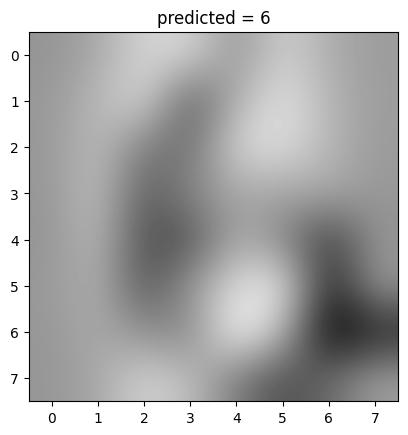

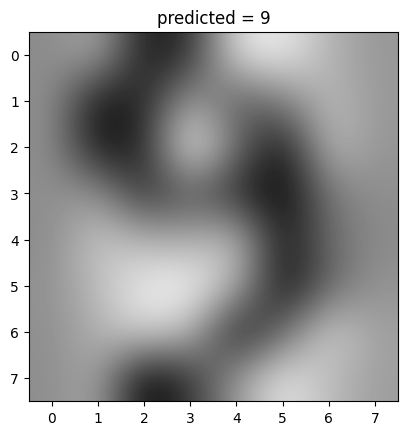

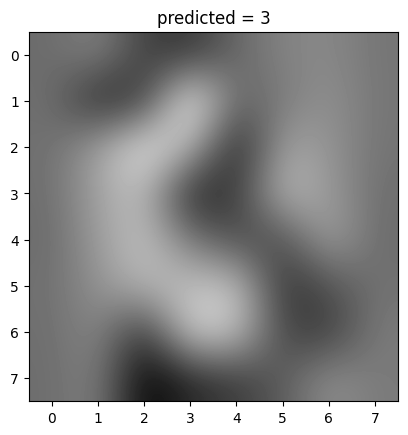

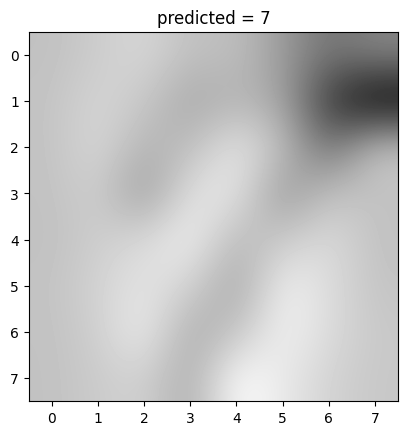

In [5]:
# Display few test images with prediction
import matplotlib.pyplot as plt

def display_image_and_prediction(index):
    #imshow is for showing the matice visually
    #bicubic is a better visualizing way than using nearest in imshow()
    plt.imshow(X_test[index].reshape(8, 8), cmap=plt.cm.gray_r, interpolation = 'bicubic')
    predicted_label = y_test[index]#clf.predict([X_test[index]])[0]
    #the [0] extract the first and in this case the only element of the prediction
    plt.title(f'predicted = {predicted_label}')
    plt.show()

for i in range(4):
    display_image_and_prediction(i)